d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum 

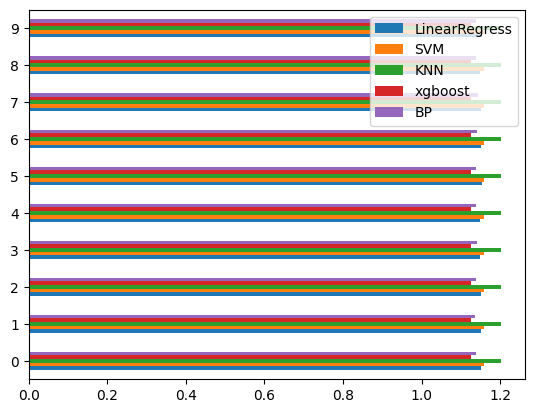

In [3]:
import pandas as pd
data = pd.read_excel('高斯混合模型.xlsx')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白', '血糖']]


x = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

#划分训练集与测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import xgboost
ret = []
for i in range(0, 10):
    tmp = []
    for model in [SGDRegressor(), SVR(kernel='rbf'), KNeighborsRegressor(), xgboost.XGBRegressor(min_child_weight = 10, eta = 0.05, colsample_bytree = 0.5, n_estimators = 100), MLPRegressor(max_iter=100)]:
        model.fit(x_train, y_train)
        tmp.append(mean_squared_error(y_test, model.predict(x_test)) ** 0.5)
    ret.append(tmp)

import numpy as np
import pylab as plt
pd.DataFrame(np.array(ret), index = range(0, 10), columns=['LinearRegress', 'SVM', 'KNN', 'xgboost', 'BP']).plot.barh()
plt.savefig('模型比较.png', dpi = 500)

C:\Users\NaClCode\AppData\Local\Temp\ipykernel_22212\1128962443.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model.fit(X_train[:m], y_train[:m])
C:\Users\NaClCode\AppData\Local\Temp\ipykernel_22212\1128962443.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
C:\Users\NaClCode\AppData\Local\Temp\ipykernel_22212\1128962443.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index 

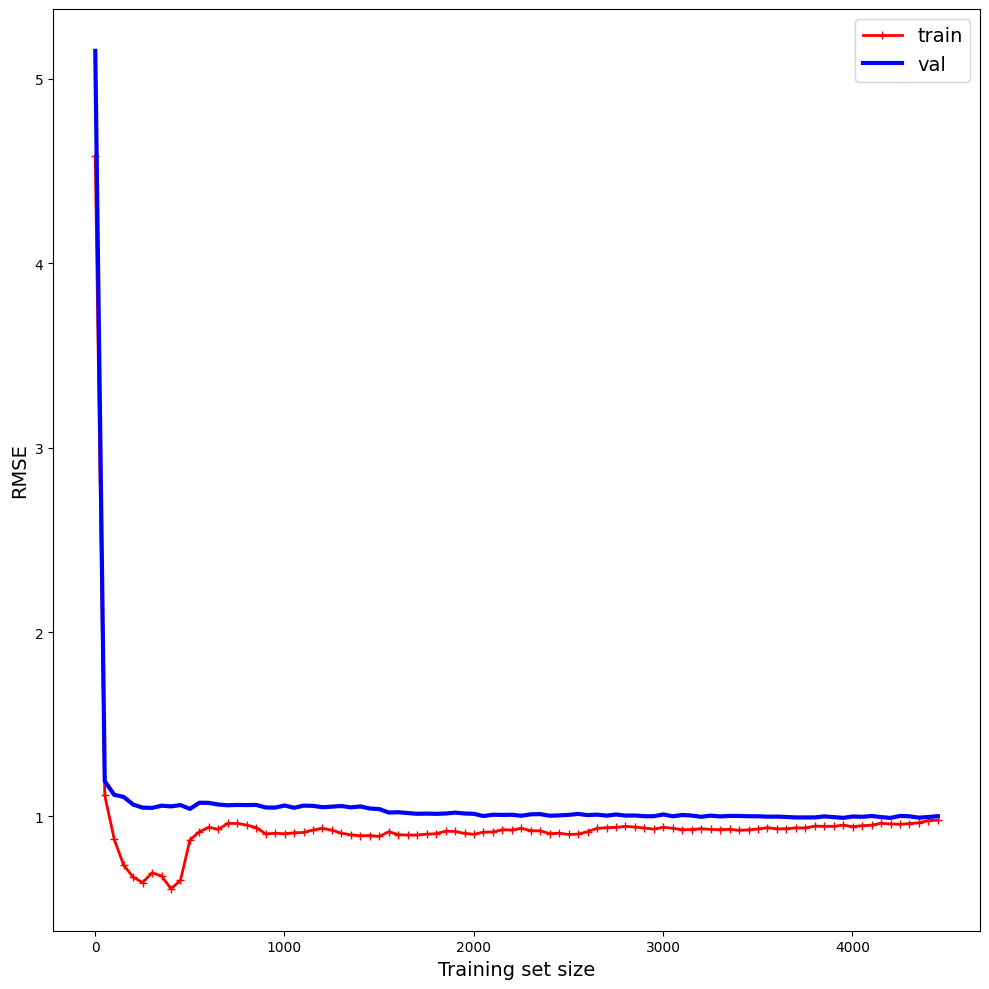

In [10]:
import pylab as plt
import pandas as pd
data = pd.read_excel('高斯混合模型.xlsx')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白', '血糖']]
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
import numpy as np
plt.figure(figsize=(10, 10))
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=228)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train), 50):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.array(range(1, len(X_train), 50)) , np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.array(range(1, len(X_train), 50)), np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown                   
plot_learning_curves(xgboost.XGBRegressor(min_child_weight = 10, eta = 0.03, n_estimators = 142, colsample_bytree = 0.78), StandardScaler().fit_transform(x), y)
plt.tight_layout()
plt.savefig('学习曲线.png', dpi = 500)